In [1]:
#all library classes are imported here
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading the data from the file
data=pd.read_csv('https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv', sep=',')
data.head(5)   #prints the first 5 indexes
data.tail(5)   #prints the last 5 indexes
data.sample(5) #prints any random 5 indexes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
5487,-118.16,33.84,36.0,2831.0,573.0,1462.0,569.0,3.8646,214600.0
11746,-121.31,37.97,45.0,2604.0,454.0,988.0,442.0,3.6667,123100.0
12217,-121.47,38.68,19.0,946.0,182.0,474.0,173.0,5.0155,97300.0
2136,-117.36,34.10,31.0,2587.0,531.0,1227.0,489.0,2.3578,88600.0
3145,-117.83,33.77,26.0,4931.0,853.0,2249.0,818.0,4.2750,285400.0


In [3]:
#to avoid getting overfitted when data follows a specific order we shuffle the data
perm=np.random.permutation(data.index)
data=data.reindex(perm)
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1254,-117.14,32.76,35.0,1785.0,493.0,965.0,506.0,2.0792,160000.0
16897,-124.02,40.72,28.0,3513.0,634.0,1658.0,598.0,3.8095,119900.0
8088,-118.42,33.85,43.0,1584.0,477.0,799.0,433.0,5.0322,435000.0
12780,-121.80,38.67,11.0,3251.0,623.0,1700.0,615.0,3.1875,172000.0
8413,-118.47,34.03,29.0,3287.0,882.0,1523.0,823.0,3.7381,290600.0


In [4]:
data['median_house_value']/=1000 #since the median house values are very large so
data['median_house_value'].head(5)

1254     160.0
16897    119.9
8088     435.0
12780    172.0
8413     290.6
Name: median_house_value, dtype: float64

In [5]:
data.describe() #look into the details of describe function

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


In [6]:
#collecting values
Y=data['median_house_value']
X=data['total_rooms']

In [7]:
#calculating the mean of all values of X and Y
mean_x=np.mean(X)
mean_y=np.mean(Y)
#total number of values
n=len(X)
num=0
den=0
for i in range(n):
    num+=(X[i]-mean_x)*(Y[i]-mean_y)
    den+=(X[i]-mean_x)**2
m=num/den
c=mean_y-mean_x*m
#print the values of m and c
print("y= {0} x + {1}".format(m,c))

y= 0.006969381760507172 x + 188.87620582068652


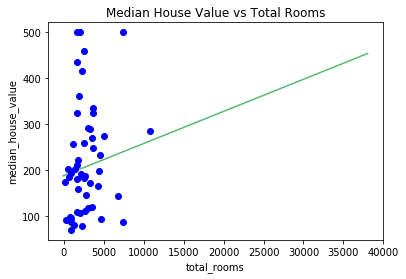

In [8]:
#plotting values and the regression line
max_x=np.max(X)+100
min_x=np.min(X)-100

#calculating the line values of x and y
x=np.linspace(min_x,max_x,1000)
y=m*x+c

#plotting the line
plt.plot(x,y,color='#58b970',label='Regression Line')

#plotting the scatter points
plt.plot(X[0:50],Y[0:50],'bo',label='Scatter Plot')

plt.xlabel('total_rooms')
plt.ylabel('median_house_value')
plt.title('Median House Value vs Total Rooms')
plt.show()